In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df_madrid_roma = pd.read_csv('../data/vuelos_Madrid_Roma_de_2025-02-1_a_2025-02-28_directos.csv')
df_roma_madrid = pd.read_csv('../data//vuelos_Roma_Madrid_de_2025-02-1_a_2025-02-28_directos.csv')

# Convertir fechas a datetime
df_madrid_roma['Fecha de Salida'] = pd.to_datetime(df_madrid_roma['Fecha de Salida'])
df_roma_madrid['Fecha de Salida'] = pd.to_datetime(df_roma_madrid['Fecha de Salida'])



Big Numbers

In [2]:
# Convertir fechas a datetime
df_madrid_roma['Fecha de Salida'] = pd.to_datetime(df_madrid_roma['Fecha de Salida'])
df_roma_madrid['Fecha de Salida'] = pd.to_datetime(df_roma_madrid['Fecha de Salida'])

# 1. Viaje más barato y más caro
viaje_mas_barato_ida = df_madrid_roma.loc[df_madrid_roma['Precio (EUR)'].idxmin()]
viaje_mas_caro_ida = df_madrid_roma.loc[df_madrid_roma['Precio (EUR)'].idxmax()]

viaje_mas_barato_vuelta = df_roma_madrid.loc[df_roma_madrid['Precio (EUR)'].idxmin()]
viaje_mas_caro_vuelta = df_roma_madrid.loc[df_roma_madrid['Precio (EUR)'].idxmax()]

# 2. Combinación de ida y vuelta con 3 días de diferencia
df_madrid_roma['Fecha de Vuelta Ideal'] = df_madrid_roma['Fecha de Salida'] + pd.Timedelta(days=3)

# Hacemos un merge para cruzar las fechas de ida y vuelta
combinaciones_optimas = pd.merge(df_madrid_roma, df_roma_madrid, how='cross', suffixes=('_ida', '_vuelta'))
combinaciones_optimas = combinaciones_optimas[combinaciones_optimas['Fecha de Salida_vuelta'] == combinaciones_optimas['Fecha de Vuelta Ideal']]

# Calculamos el precio total de ida y vuelta
combinaciones_optimas['Precio Total'] = combinaciones_optimas['Precio (EUR)_ida'] + combinaciones_optimas['Precio (EUR)_vuelta']

# Encontrar la combinación más barata
combinacion_mas_barata = combinaciones_optimas.loc[combinaciones_optimas['Precio Total'].idxmin()]

# Mostrar resultados
print("Viaje más barato (Ida: Madrid -> Roma):")
print(viaje_mas_barato_ida)

print("\nViaje más caro (Ida: Madrid -> Roma):")
print(viaje_mas_caro_ida)

print("\nViaje más barato (Vuelta: Roma -> Madrid):")
print(viaje_mas_barato_vuelta)

print("\nViaje más caro (Vuelta: Roma -> Madrid):")
print(viaje_mas_caro_vuelta)

print("\nCombinación más barata (Ida y vuelta con 3 días de diferencia):")
print(combinacion_mas_barata[['Fecha de Salida_ida','Hora de Salida_ida', 'Fecha de Salida_vuelta', 'Hora de Salida_vuelta','Precio (EUR)_ida', 'Precio (EUR)_vuelta', 'Precio Total']])


Viaje más barato (Ida: Madrid -> Roma):
Aeropuerto de Salida                      MAD
Aeropuerto de Llegada                     FCO
Código de la Aerolínea                     UX
Número de Vuelo                          1043
Duración (Minutos)                        145
Precio (EUR)                             49.8
Fecha de Salida           2025-02-03 00:00:00
Hora de Salida                       07:05:00
Fecha de extracción                2024-10-19
Name: 29, dtype: object

Viaje más caro (Ida: Madrid -> Roma):
Aeropuerto de Salida                      MAD
Aeropuerto de Llegada                     FCO
Código de la Aerolínea                     IB
Número de Vuelo                           647
Duración (Minutos)                        145
Precio (EUR)                            525.8
Fecha de Salida           2025-02-28 00:00:00
Hora de Salida                       08:45:00
Fecha de extracción                2024-10-19
Name: 414, dtype: object

Viaje más barato (Vuelta: Roma -> Madrid):


Graficas

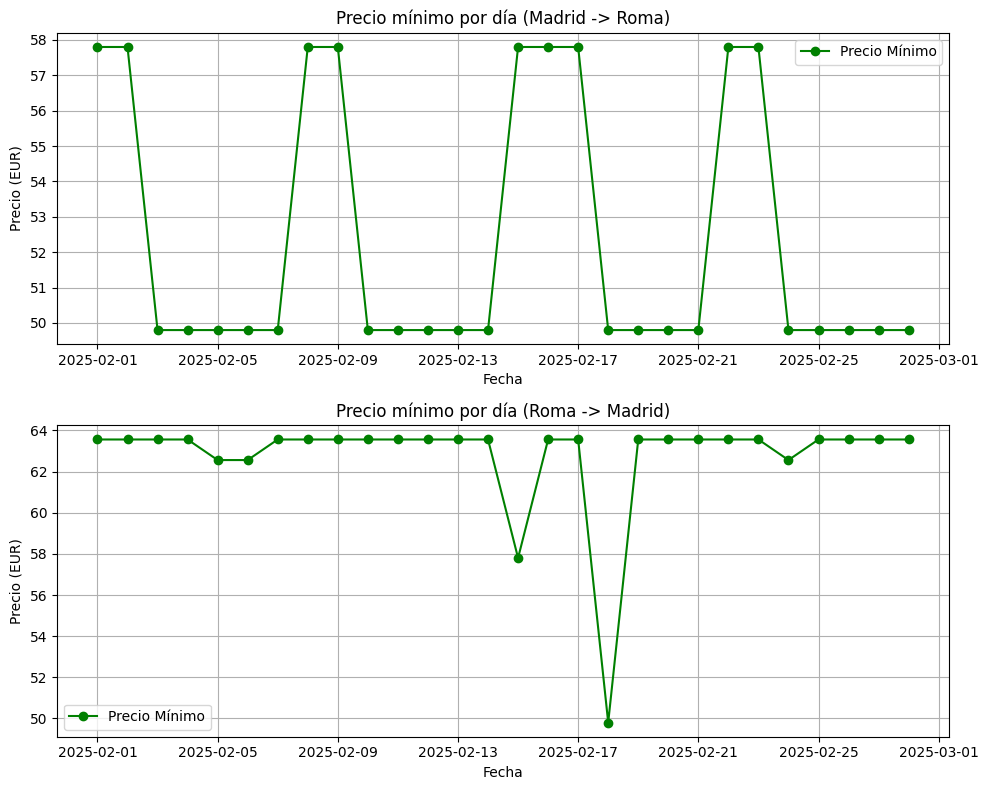

In [3]:
# 1. Precio mínimo por día

# Agrupación de datos para precios más altos y más bajos
precio_min_madrid_paris = df_madrid_roma.groupby(df_madrid_roma['Fecha de Salida'].dt.date)['Precio (EUR)'].min()

precio_min_paris_madrid = df_roma_madrid.groupby(df_roma_madrid['Fecha de Salida'].dt.date)['Precio (EUR)'].min()

# Gráficos de precios máximos y mínimos
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Madrid -> Roma
ax[0].plot(precio_min_madrid_paris.index, precio_min_madrid_paris.values, label='Precio Mínimo', color='green', marker='o')
ax[0].set_title('Precio mínimo por día (Madrid -> Roma)')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Precio (EUR)')
ax[0].grid(True)
ax[0].legend()

# Roma -> Madrid
ax[1].plot(precio_min_paris_madrid.index, precio_min_paris_madrid.values, label='Precio Mínimo', color='green', marker='o')
ax[1].set_title('Precio mínimo por día (Roma -> Madrid)')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Precio (EUR)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


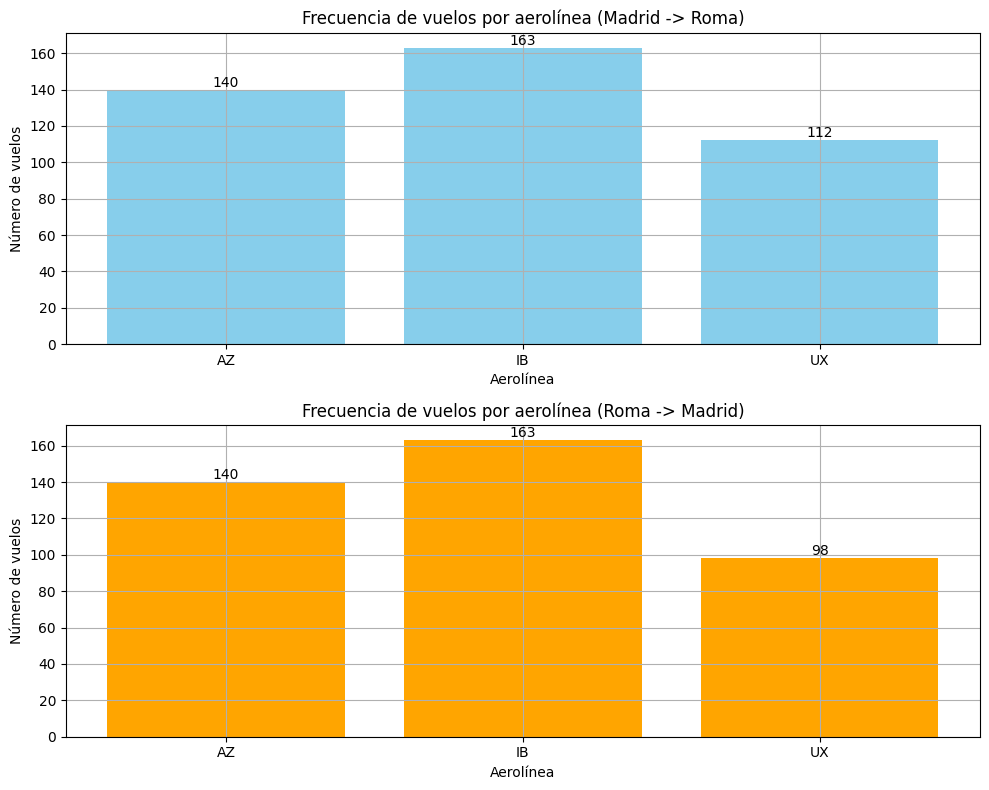

In [4]:
# 2. Frecuencia de vuelos por aerolínea

frecuencia_por_aerolinea_madrid_paris = df_madrid_roma.groupby('Código de la Aerolínea')['Número de Vuelo'].count()
frecuencia_por_aerolinea_paris_madrid = df_roma_madrid.groupby('Código de la Aerolínea')['Número de Vuelo'].count()

# Gráficos de frecuencia por aerolínea
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Madrid -> Roma
bars = ax[0].bar(frecuencia_por_aerolinea_madrid_paris.index, frecuencia_por_aerolinea_madrid_paris.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Ubicación y valor

ax[0].set_title('Frecuencia de vuelos por aerolínea (Madrid -> Roma)')
ax[0].set_xlabel('Aerolínea')
ax[0].set_ylabel('Número de vuelos')
ax[0].grid(True)

# Roma -> Madrid
bars = ax[1].bar(frecuencia_por_aerolinea_paris_madrid.index, frecuencia_por_aerolinea_paris_madrid.values, color='orange')
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Ubicación y valor

ax[1].set_title('Frecuencia de vuelos por aerolínea (Roma -> Madrid)')
ax[1].set_xlabel('Aerolínea')
ax[1].set_ylabel('Número de vuelos')
ax[1].grid(True)

plt.tight_layout()
plt.show()




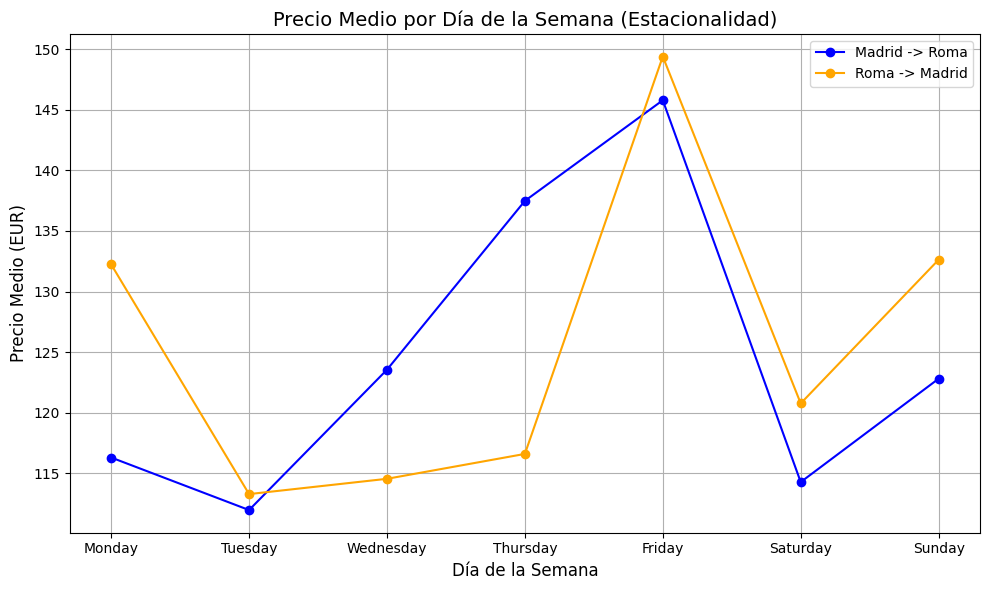

In [5]:
# 3. Duración de vuelos por aerolínea

# Convertir la columna de día de la semana en español
df_madrid_roma['Fecha de Salida'] = pd.to_datetime(df_madrid_roma['Fecha de Salida'])
df_roma_madrid['Fecha de Salida'] = pd.to_datetime(df_roma_madrid['Fecha de Salida'])

df_madrid_roma['Dia de la Semana'] = df_madrid_roma['Fecha de Salida'].dt.day_name()
df_roma_madrid['Dia de la Semana'] = df_roma_madrid['Fecha de Salida'].dt.day_name()

# Obtener el precio medio por día de la semana para cada trayecto
precio_medio_por_dia_madrid_paris = df_madrid_roma.groupby('Dia de la Semana')['Precio (EUR)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

precio_medio_por_dia_paris_madrid = df_roma_madrid.groupby('Dia de la Semana')['Precio (EUR)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los precios medios por día de la semana
ax.plot(precio_medio_por_dia_madrid_paris.index, precio_medio_por_dia_madrid_paris.values, marker='o', label='Madrid -> Roma', color='blue')
ax.plot(precio_medio_por_dia_paris_madrid.index, precio_medio_por_dia_paris_madrid.values, marker='o', label='Roma -> Madrid', color='orange')

# Configuración del gráfico
ax.set_title('Precio Medio por Día de la Semana (Estacionalidad)', fontsize=14)
ax.set_xlabel('Día de la Semana', fontsize=12)
ax.set_ylabel('Precio Medio (EUR)', fontsize=12)
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


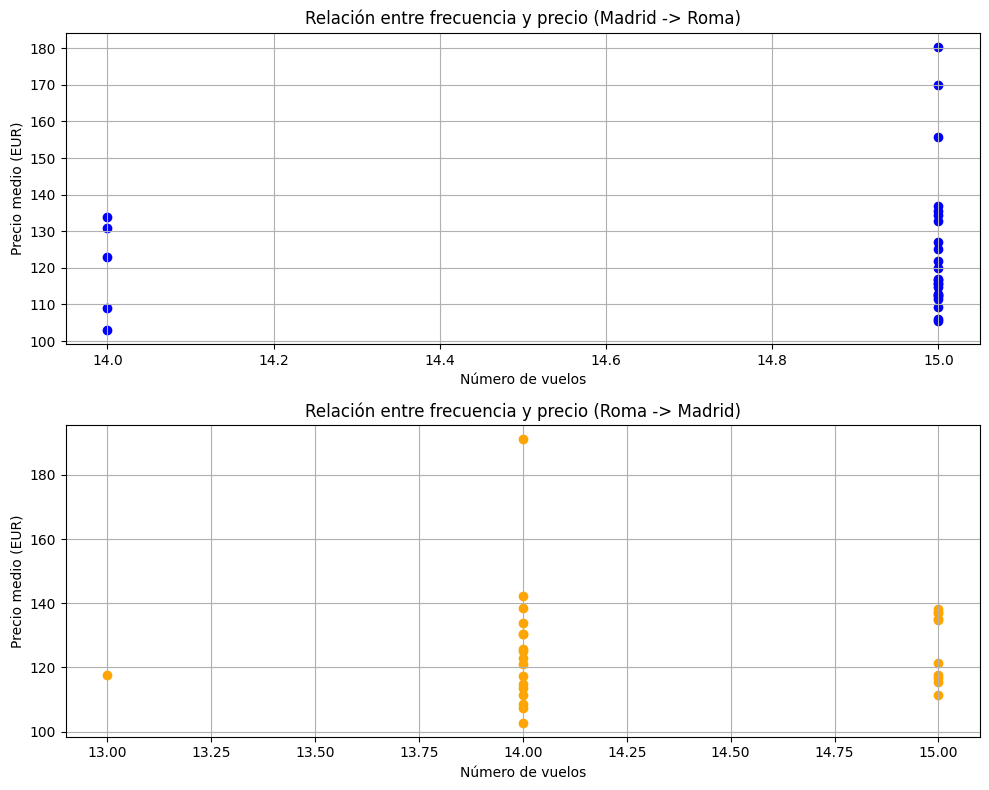

In [6]:
# 4. Relación entre frecuencia de vuelos y precios por día

# Precios y frecuencia de vuelos por día
precio_medio_madrid_paris = df_madrid_roma.groupby(df_madrid_roma['Fecha de Salida'].dt.date)['Precio (EUR)'].mean()
precio_medio_paris_madrid = df_roma_madrid.groupby(df_roma_madrid['Fecha de Salida'].dt.date)['Precio (EUR)'].mean()

frecuencia_madrid_paris = df_madrid_roma.groupby(df_madrid_roma['Fecha de Salida'].dt.date)['Número de Vuelo'].count()
frecuencia_paris_madrid = df_roma_madrid.groupby(df_roma_madrid['Fecha de Salida'].dt.date)['Número de Vuelo'].count()

# Gráficos de relación entre frecuencia y precio
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Madrid -> Roma
ax[0].scatter(frecuencia_madrid_paris, precio_medio_madrid_paris, color='blue')
ax[0].set_title('Relación entre frecuencia y precio (Madrid -> Roma)')
ax[0].set_xlabel('Número de vuelos')
ax[0].set_ylabel('Precio medio (EUR)')
ax[0].grid(True)

# Roma -> Madrid
ax[1].scatter(frecuencia_paris_madrid, precio_medio_paris_madrid, color='orange')
ax[1].set_title('Relación entre frecuencia y precio (Roma -> Madrid)')
ax[1].set_xlabel('Número de vuelos')
ax[1].set_ylabel('Precio medio (EUR)')
ax[1].grid(True)

plt.tight_layout()
plt.show()